<a href="https://colab.research.google.com/github/snehapvt212001-commits/prediction/blob/main/cifar10(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense,Dropout
from  tensorflow.keras.optimizers import Adam
from  tensorflow.keras.utils import to_categorical
import cv2
import seaborn as sns
import os
import pickle
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten


In [ ]:
from keras.datasets import cifar10

In [ ]:
(xtr,ytr),(xts,yts)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
xtr.shape

(50000, 32, 32, 3)

In [ ]:
ytr.shape

(50000, 1)

In [ ]:
ytr=ytr.reshape((ytr.shape[0]))

In [ ]:
ytr.shape

(50000,)

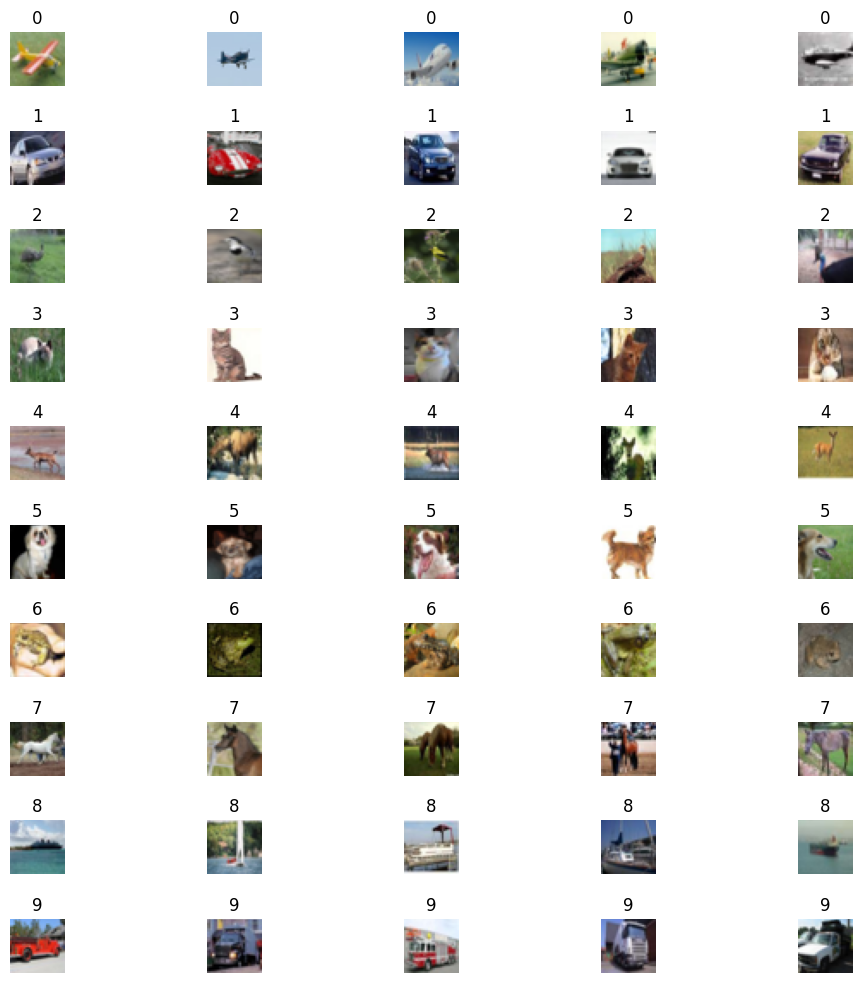

In [ ]:
ncols=5
nclasses=10
fig,axes=plt.subplots(ncols=ncols,nrows=nclasses,figsize=(10,10))
fig.tight_layout()
for i in range(ncols):
  for j in range(nclasses):
    x_selected= xtr[ytr==j]
    axes[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap("gray"))
    axes[j][i].axis("off")

    axes[j][i].set_title(str(j))
plt.show()

In [ ]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

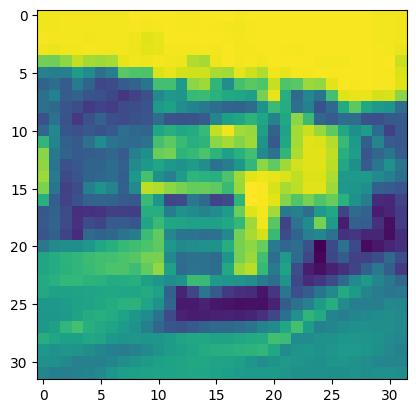

In [ ]:
img=grayscale(xtr[1000])
plt.imshow(img)

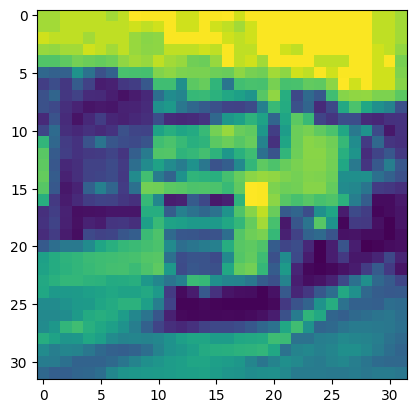

In [ ]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

img=equalize(img)
plt.imshow(img)

In [ ]:
def preprocess(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

In [ ]:
xtr=np.array(list(map(preprocess,xtr)))
xts=np.array(list(map(preprocess,xts)))

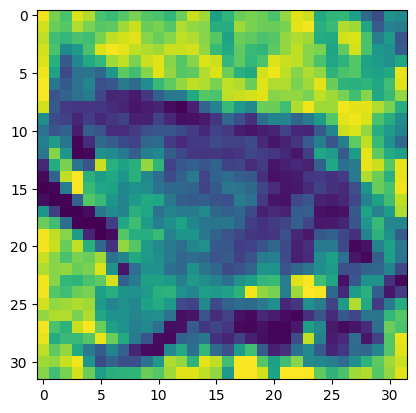

In [ ]:
plt.imshow(xtr[random.randint(0,len(xtr)-1)])

In [ ]:
xtr=xtr.reshape(xtr.shape[0],32,32,1)
xts=xts.reshape(xts.shape[0],32,32,1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,
                           zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [ ]:
datagen.fit(xtr)

In [ ]:
batches=datagen.flow(xtr,ytr,batch_size=15)
x_batch,y_batch=next(batches)

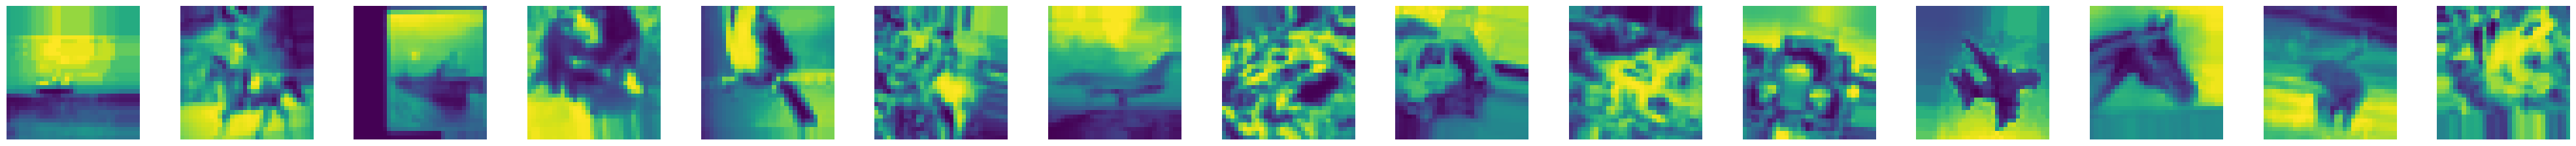

In [ ]:
fig,axes = plt.subplots(1,15,figsize=(40,20))
fig.tight_layout()
for i in range(15):
  axes[i].imshow(x_batch[i].reshape(32,32))
  axes[i].axis('off')

In [ ]:
def modified_model():
  model=Sequential()
  model.add(Conv2D(85,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(85,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(90,(2,2),activation='relu'))
  model.add(Conv2D(90,(2,2),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(10,activation='softmax'))
  model.compile(Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
ytr=to_categorical(ytr,10)
yts=to_categorical(yts,10)

In [ ]:
model=modified_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 85)     │         2,210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 85)     │       180,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 85)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 90)     │        30,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 90)     │        32,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 90)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2250)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     1,125,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,376,610 (5.25 MB)

 Trainable params: 1,376,610 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
ytr.shape

(50000, 10)

In [ ]:
len(xtr)

50000

In [ ]:
# Convert ytr back to one-hot encoding within the flow if needed, or adjust loss function
h=model.fit(datagen.flow(xtr,ytr,batch_size=20),steps_per_epoch=len(xtr)//20,epochs=35,validation_data=(xts,yts),shuffle=True)

Epoch 1/35
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7277 - loss: 0.7775 - val_accuracy: 0.7296 - val_loss: 0.8154
Epoch 2/35
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7299 - loss: 0.7721 - val_accuracy: 0.7412 - val_loss: 0.7627
Epoch 3/35
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7337 - loss: 0.7699 - val_accuracy: 0.7374 - val_loss: 0.7653
Epoch 4/35
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7375 - loss: 0.7589 - val_accuracy: 0.7254 - val_loss: 0.8250
Epoch 5/35
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7391 - loss: 0.7510 - val_accuracy: 0.7263 - val_loss: 0.8235
Epoch 6/35
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7432 - loss: 0.7461 - val_accuracy: 0.7226 - val_loss: 0.8263
Epoch 7/35
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.7383 - loss: 0.7481 - val_accuracy: 0.7408 - val_loss: 0.7820
Epoch 8/35
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7406 -

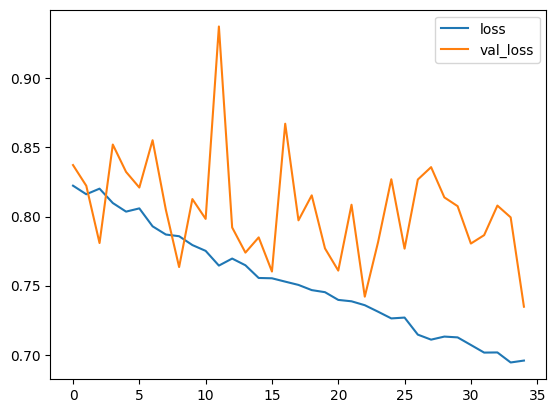

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])

In [ ]:
from google.colab import files
upload=files.upload()

Saving cut cat serhio 02-1813x1811-720x719.jpg to cut cat serhio 02-1813x1811-720x719 (1).jpg


In [ ]:
d=list(upload.keys())[0]
print(d)

cut cat serhio 02-1813x1811-720x719 (1).jpg


[255 216 255 ... 127 255 217]


/tmp/ipython-input-165-1491704237.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


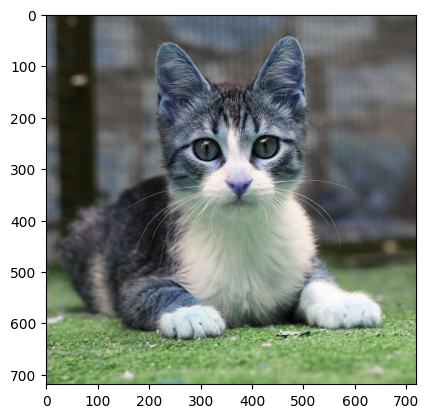

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

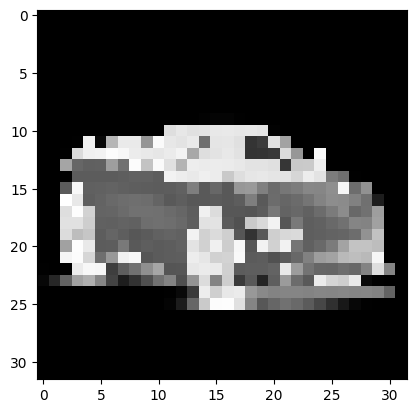

In [ ]:
img=cv2.resize(img,(32,32))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img = img / 255.0
img = img.reshape(1, 32, 32, 1)  # Ensure batch size and shape

prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
print("Predicted class:", predicted_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: 1
